## Gramáticas de Lindenmayer

Los [**sistemas de Lindenmayer**](https://es.wikipedia.org/wiki/Sistema-L), o **Sistemas-L** (L-systems), porporcionan una técnica
muy potente para la generación de imágenes fractales. Lindenmayer usó los sistemas-L
para describir el comportamiento de celulas vegetales y para modelar el proceso
de crecimiento de una planta.

Un sistema-L es un sistema de reescritura, y formalmente son un tipo 
de gramática. Consiste en un conjunto de **símbolos** o alfabeto
(que poedemos representar con caracteres o cadenas de texto), un
conjunto de **reglas de producción** que pueden expandir cada símbolo
por una cadena más larga de símbolos, un **axioma**, que es un símbolo o
cadena de símbolos inicial, y algún mecanismo para convertir las cadenas
generadas en forma de estructuras geométricas.

### Un ejemplo sencilla

Para ver un ejemplo sencillo, veamos el sistema-L original que usó Lindenmayer
para modelar el crecimiento de un alga. En este sistema trabajamos con
solo dos símbolos, `A` y `B`. Las reglas son solo dos:

- Cuando encontremos `A`, cambiarlo por `AB` (`A -> AB`)
- Cuando encontremos `B`, reemplazarlo con A (`B -> A`)

El axioma o estado inicial es `A`.

Aplicando la primera regla generamos
`AB` y terminamos esta iteración. Empezamos ahora con `AB`. De nuevo,
sustituimos `A` por `AB`, pasamos al segundo caracter, `B`, y lo reemplazamos
por `A` siguiendo la segunda regla, con lo que el resultado final es
`ABA`. En la tercera iteración, se obtiene la cadena de texto `ABAAB`, en 
la cuarta `ABAABABA`, y así sucesivamente.

Vamos a hacer una primera aproximación para generar sucesivas iteraciones:

In [1]:
# Definamos las reglas

def rule1(c):
    if c == 'A':
        return 'AB'

def rule2(c):
    if c == 'B':
        return 'A'

rules = set([rule1, rule2])
 
# El axima o estado inicial
    
initial = 'A'

# La función que pasa de una cadena de simbolos a la siguiente

def next(s):
    result = []
    for c in s:  # Las reglas se aplican a toda la secuencia
        for rule in rules:
            new_item = rule(c)
            if new_item is not None:
                result.append(new_item)
    return ''.join(result)

status = initial
for i in range(5):
    print('Generación:', i, 'Status:', status, len(status))
    status = next(status)
print('Generación:', i, 'Status:', status, len(status))
    

Generación: 0 Status: A 1
Generación: 1 Status: AB 2
Generación: 2 Status: ABA 3
Generación: 3 Status: ABAAB 5
Generación: 4 Status: ABAABABA 8
Generación: 4 Status: ABAABABAABAAB 13


**Nota:** La longitud de cada una de estas cadenas consecutivas es 1, 2, 3, 5,
8... ¿Le recuerda algo? Pista: Añadir otro uno antes de la secuencia.

## Un ejemplo más complejo

Podemos extender este sistema básico con algunas simbolos, que podemos interpretar
como instrucciones, como por ejemplo, `-` para indicar `gira hacia la izquierda en un determinado ángulo` 
y `+` para indicar giro a la derecha. `F` podría significar `Sigue adelante`.

Estas instrucciones pueden ser representadas de forma muy fácil usando
gráficos de tipo tortuga. Por ejemplo, la [Curva de Hilbert](https://es.wikipedia.org/wiki/Curva_de_Hilbert)
puede dibujarse mediante las siguientes reglas:

A -> − B F + A F A + F B −

B -> + A F − B F B − F A +


Vamos a crear una clase par representar las reglas:

In [2]:
class Rule:

    def __init__(self, target, production):
        self.target = target
        self.production = production
        
    def __call__(self, s):
        if s == self.target:
            return self.production
        
    def __str__(self):
        return '{} -> {}'.format(self.target, self.production)

rules = set([
    Rule('A', 'AB'),
    Rule('B', 'A'),
    ])

initial = 'A'

# La función que pasa de una cadena de simbolos a la siguiente

def next(s):
    result = []
    for c in s:  # Las reglas se aplican a toda la secuencia
        for rule in rules:
            new_item = rule(c)
            if new_item is not None:
                result.append(new_item)
    return ''.join(result)

status = initial
for i in range(5):
    print('Generación:', i, 'Status:', status, len(status))
    status = next(status)
print('Generación:', i, 'Status:', status, len(status))
    

def rule2(c):
    if c == 'B':
        return 'A'


Generación: 0 Status: A 1
Generación: 1 Status: AB 2
Generación: 2 Status: ABA 3
Generación: 3 Status: ABAAB 5
Generación: 4 Status: ABAABABA 8
Generación: 4 Status: ABAABABAABAAB 13


Las reglas completas para la producción del alga roja son:
    
    a -> b|c
    b -> b
    c -> b|d
    d -> e\d
    e -> f
    f -> g
    g -> h(a)
    h -> h
    ( -> (
    ) -> )
    | -> |
    / -> \
    \ -> /


In [3]:
rules = set([
    Rule('a', 'b|c'),
    Rule('b', 'b'),
    Rule('c', 'b|d'),
    Rule('d', 'e\\d'),
    Rule('e', 'f'),
    Rule('f', 'g'),
    Rule('g', 'h(a)'),
    Rule('h', 'h'),
    Rule('(', '('),
    Rule(')', ')'),
    Rule('|', '|'),
    Rule('/', '\\'),
    Rule('\\', '/'),
    ])

initial = 'a'

status = initial
for i in range(8):
    print('Generación:', i, 'Status:', status, len(status))
    status = next(status)
print('Generación:', i+1, 'Status:', status, len(status))
    


Generación: 0 Status: a 1
Generación: 1 Status: b|c 3
Generación: 2 Status: b|b|d 5
Generación: 3 Status: b|b|e\d 7
Generación: 4 Status: b|b|f/e\d 9
Generación: 5 Status: b|b|g\f/e\d 11
Generación: 6 Status: b|b|h(a)/g\f/e\d 16
Generación: 7 Status: b|b|h(b|c)\h(a)/g\f/e\d 23
Generación: 8 Status: b|b|h(b|b|d)/h(b|c)\h(a)/g\f/e\d 32


In [4]:
from PIL import Image, ImageDraw

green = (33, 233, 33)

img = Image.new('RGB', (500, 500), color=(233,233,233))
x = 5
y = 250
print(status)

def pipe():
    global x, y, img, green
    draw = ImageDraw.Draw(img)
    lines = [
        (x+5, y-5),
        (x+5, y+5)
    ]
    draw.line(lines, green)

def b():
    global x, y, img, green
    draw = ImageDraw.Draw(img)
    lines = [
        (x+5, y-5),
        (x-5, y-5),
        (x-5, y+5),
        (x+5, y+5)
    ]
    draw.line(lines, green, width=2)
    x += 10
    
b(); pipe(); b()

b|b|h(b|b|d)/h(b|c)\h(a)/g\f/e\d


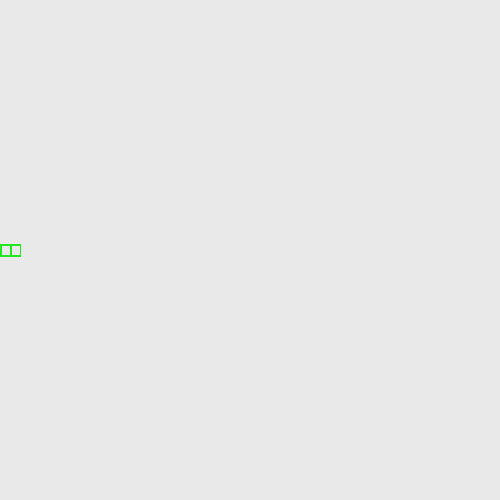

In [5]:
img

In [18]:
rules = set([
    Rule('F', 'F[+F]F[-F]F'),
    Rule('[', '['),
    Rule(']', ']'),
    Rule('+', '+'),
    Rule('-', '-'),
    ])

initial = 'F'

status = initial
for i in range(5):
    print('Generación:', i, 'Status:', status, len(status))
    status = next(status)
print('Generación:', i+1, 'Status:', status, len(status))
    


Generación: 0 Status: F 1
Generación: 1 Status: F[+F]F[-F]F 11
Generación: 2 Status: F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F 61
Generación: 3 Status: F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F 311
Generación: 4 Status: F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[

In [13]:
import math, tortuga


set_angle called
set_angle called


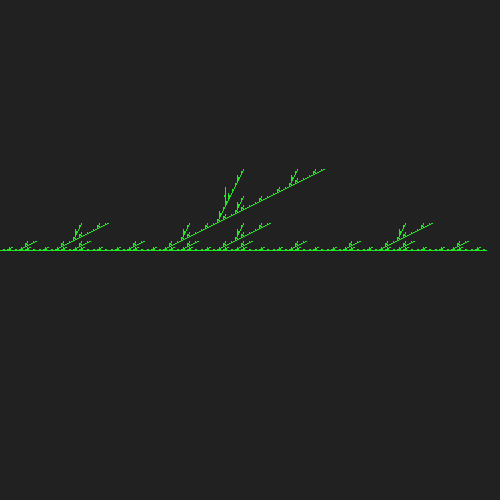

In [24]:
t = tortuga.Turtle((500, 500), pos=tortuga.Vector(0, 250))
t.angle = 25.7 * math.pi / 180.
for c in status:
    if c == 'F':
        t.forward(2)
    elif c == '+':
        t.left()
    elif c == '+':
        t.right()
    elif c == '[':
        t.push()
    elif c == ']':
        t.pop()
t.img        

set_angle called
set_angle called


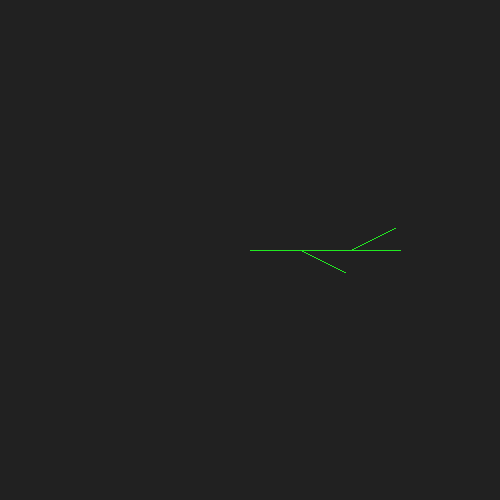

In [20]:
t = tortuga.Turtle((500, 500))
t.angle = 25.7 * math.pi / 180.0
t.forward(50)
t.push()
t.right()
t.forward(50)
t.pop()
t.forward(50)
t.push()
t.left()
t.forward(50)
t.pop()
t.forward(50)
t.img


set_angle called
set_angle called


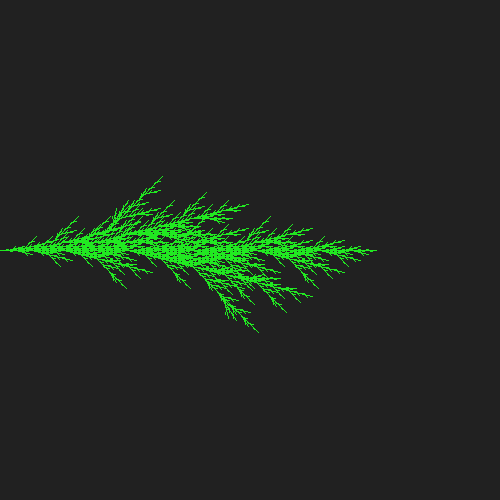

In [30]:
rules = set([
    Rule('F', 'F[+F]F[-F][FF]'),
    Rule('[', '['),
    Rule(']', ']'),
    Rule('+', '+'),
    Rule('-', '-'),
    ])

initial = 'F'

status = initial
for i in range(5):
    status = next(status)

t = tortuga.Turtle((500, 500), pos=tortuga.Vector(0, 250))
t.angle = 20. * math.pi / 180.
for c in status:
    if c == 'F':
        t.forward(4)
    elif c == '+':
        t.left()
    elif c == '-':
        t.right()
    elif c == '[':
        t.push()
    elif c == ']':
        t.pop()
t.img    
